In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [ ]:
import altair as alt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# reading the dataset into a pandas DataFrame
df = pd.read_csv('/content/sample_data/creditcard.csv')

In [ ]:
# displays the number of rows and columns in the DataFrame
df.shape

(29799, 31)

In [ ]:
# displays column name, datatypes, non-null values count and memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29799 entries, 0 to 29798
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    29799 non-null  int64  
 1   V1      29799 non-null  float64
 2   V2      29799 non-null  float64
 3   V3      29799 non-null  float64
 4   V4      29799 non-null  float64
 5   V5      29799 non-null  float64
 6   V6      29798 non-null  float64
 7   V7      29798 non-null  float64
 8   V8      29798 non-null  float64
 9   V9      29798 non-null  float64
 10  V10     29798 non-null  float64
 11  V11     29798 non-null  float64
 12  V12     29798 non-null  float64
 13  V13     29798 non-null  float64
 14  V14     29798 non-null  float64
 15  V15     29798 non-null  float64
 16  V16     29798 non-null  float64
 17  V17     29798 non-null  float64
 18  V18     29798 non-null  float64
 19  V19     29798 non-null  float64
 20  V20     29798 non-null  float64
 21  V21     29798 non-null  float64
 22

In [ ]:
# count of duplicated rows in the DataFrame
df.duplicated().sum()

121

In [ ]:
df2 = df.copy()

In [ ]:
# dropping duplicate rows in the DataFrame, while keeping the first instance of such records
df3 = df2.drop_duplicates(keep='first')

In [ ]:
# count of rows and columns(features) in the DataFrame
df3.shape

(29678, 31)

In [ ]:
# statistical summary of numerical columns(features) in the DataFrame
df3.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,29678.0,21415.387492,12030.814542,0.000000,10137.500000,26169.000000,32190.000000,35634.000000
V1,29678.0,-0.207287,1.845087,-30.552380,-0.948244,-0.248095,1.165967,1.960497
V2,29678.0,0.122611,1.543908,-40.978852,-0.448870,0.148444,0.784632,16.713389
V3,29678.0,0.720453,1.615868,-31.103685,0.262172,0.845388,1.473957,4.101716
V4,29678.0,0.210962,1.420244,-5.172595,-0.699779,0.193831,1.093566,13.143668
V5,29678.0,-0.203390,1.420899,-42.147898,-0.798279,-0.236499,0.312941,34.099309
V6,29677.0,0.086943,1.321608,-23.496714,-0.655624,-0.173493,0.472825,22.529298
V7,29677.0,-0.120732,1.292389,-26.548144,-0.594427,-0.067956,0.445003,36.677268
V8,29677.0,0.031736,1.282120,-41.484823,-0.160211,0.035351,0.292860,20.007208
V9,29677.0,0.349420,1.257851,-7.175097,-0.459426,0.242617,1.106746,10.392889


# Visualizations

In [ ]:
# columns in the DataFrame
df3.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [ ]:
# importing the altair, matplotlib and seaborn libraries for data visualization
import altair as alt
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='Amount', ylabel='Density'>

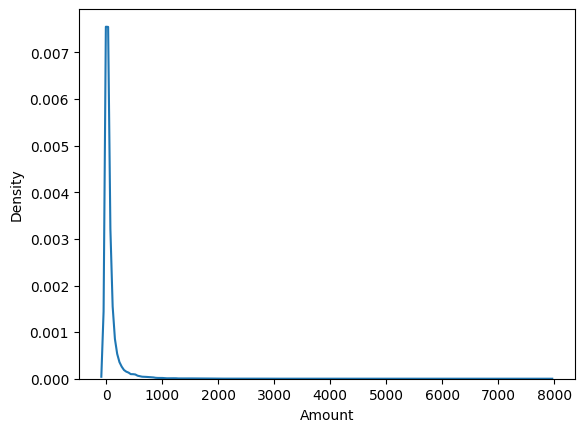

In [ ]:
sns.kdeplot(data=df3, x='Amount')

In [ ]:
df3[df3['Amount']==0]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
383,282,-0.356466,0.725418,1.971749,0.831343,0.369681,-0.107776,0.751610,-0.120166,-0.420675,...,0.020804,0.424312,-0.015989,0.466754,-0.809962,0.657334,-0.043150,-0.046401,0.0,0.0
514,380,-1.299837,0.881817,1.452842,-1.293698,-0.025105,-1.170103,0.861610,-0.193934,0.592001,...,-0.272563,-0.360853,0.223911,0.598930,-0.397705,0.637141,0.234872,0.021379,0.0,0.0
534,403,1.237413,0.512365,0.687746,1.693872,-0.236323,-0.650232,0.118066,-0.230545,-0.808523,...,-0.077543,-0.178220,0.038722,0.471218,0.289249,0.871803,-0.066884,0.012986,0.0,0.0
541,406,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.0,1.0
575,430,-1.860258,-0.629859,0.966570,0.844632,0.759983,-1.481173,-0.509681,0.540722,-0.733623,...,0.268028,0.125515,-0.225029,0.586664,-0.031598,0.570168,-0.043007,-0.223739,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29368,35442,-0.837939,-0.144833,2.178315,1.980793,0.900604,-0.604822,0.203115,-0.491911,-2.346752,...,-0.211680,0.096950,0.056600,0.598439,-0.482602,0.032297,-0.366680,-0.107608,0.0,0.0
29473,35483,1.286640,0.072917,0.212182,-0.269732,-0.283961,-0.663306,-0.016385,-0.120297,-0.135962,...,-0.194829,-0.554362,0.052674,0.076792,0.209208,0.847617,-0.086559,-0.008262,0.0,0.0
29670,35579,-3.618595,-0.803056,-0.408090,0.087635,0.846719,-1.235776,-0.452179,0.825664,-0.000578,...,-0.037128,0.479830,0.494492,0.079408,-0.241282,0.309596,-0.163615,0.614517,0.0,0.0
29715,35599,1.168909,-0.139981,-0.095518,1.735426,1.699903,4.646212,-1.191502,1.205700,0.333882,...,-0.033003,0.114218,-0.163863,1.045593,0.775343,0.228745,0.050846,0.020019,0.0,0.0


In [ ]:
# removing transactions with amount equal to zero
df4= df3[df3['Amount']>0]
df4.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [ ]:
df4.shape

(29414, 31)

In [ ]:
df4[df4['Amount']==0]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class


In [ ]:
df4['Class'].value_counts()

0.0    29323
1.0       91
Name: Class, dtype: int64

In [ ]:
# the class feature is imbalanced

In [ ]:
dict_1 = {0: 'legitimate', 1:'fraudulent'}
df4['Class'] = df4['Class'].replace(dict_1).astype('category')

<ipython-input-59-49b31668e5cc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['Class'] = df4['Class'].replace(dict_1).astype('category')


In [ ]:
df4['Class']

0        legitimate
1        legitimate
2        legitimate
3        legitimate
4        legitimate
            ...    
29793    legitimate
29794    legitimate
29795    legitimate
29796    legitimate
29797    legitimate
Name: Class, Length: 29414, dtype: category
Categories (2, object): ['fraudulent', 'legitimate']

<Axes: title={'center': 'Class Distribution'}, xlabel='Class', ylabel='count'>

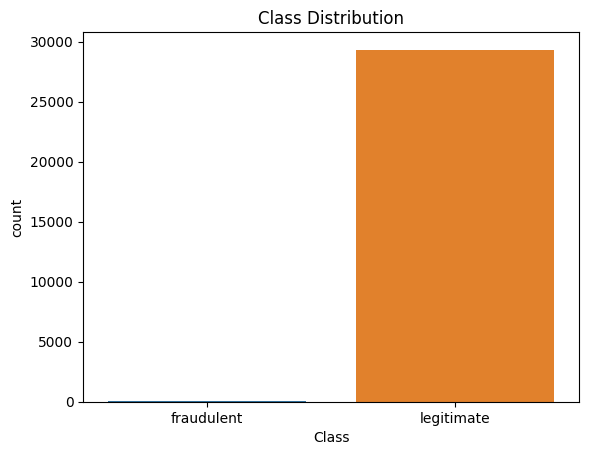

In [ ]:
plt.title('Class Distribution')
sns.countplot(data=df4, x='Class')

<Axes: xlabel='Amount', ylabel='Class'>

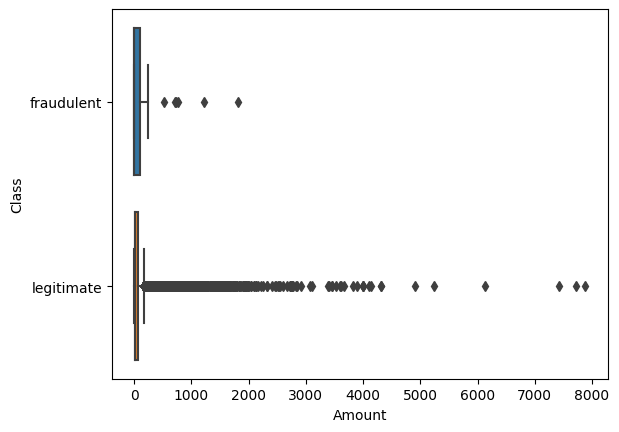

In [ ]:
sns.boxplot(data=df4, y='Class', x='Amount')

In [ ]:
df4.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,29414.0,21431.089583,12027.881513,0.000000,10159.750000,26188.500000,32195.500000,35634.000000
V1,29414.0,-0.208792,1.848779,-30.552380,-0.948200,-0.249380,1.166298,1.960497
V2,29414.0,0.121174,1.548699,-40.978852,-0.454302,0.146074,0.784620,16.713389
V3,29414.0,0.712497,1.618425,-31.103685,0.256901,0.837754,1.463839,4.101716
V4,29414.0,0.195271,1.411596,-5.172595,-0.706670,0.180844,1.072640,13.143668
V5,29414.0,-0.205777,1.423395,-42.147898,-0.801210,-0.236655,0.312571,34.099309
V6,29414.0,0.083098,1.322060,-23.496714,-0.657653,-0.177591,0.462962,22.529298
V7,29414.0,-0.117388,1.295912,-26.548144,-0.590906,-0.063785,0.448598,36.677268
V8,29414.0,0.030722,1.285982,-41.484823,-0.161182,0.033715,0.291075,20.007208
V9,29414.0,0.349387,1.261182,-7.175097,-0.462596,0.239978,1.108577,10.392889


In [ ]:
df4['Time'].value_counts()

3767     21
3770     20
3750     19
19912    19
3766     17
         ..
10523     1
25478     1
10522     1
10520     1
35634     1
Name: Time, Length: 17245, dtype: int64

<Axes: xlabel='Time', ylabel='Density'>

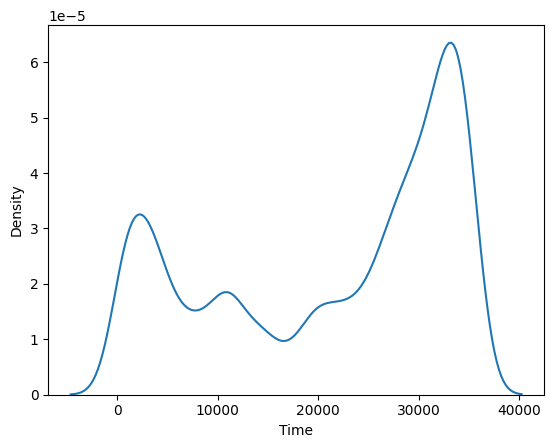

In [ ]:
sns.kdeplot(data=df4, x='Time')

# Classification model 1

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [ ]:
X = df4.copy()
Y= X.pop('Class')

In [ ]:
feature = ['Time','Amount']
X_num = X[feature]
# scaling the 'Time', and 'Amount' feature using standardization
X_num = (X_num - X_num.mean())/ X_num.std()
# X_num = X_num.fillna(X_num.mean())
X_num.head()

,Time,Amount
0,-1.781784,0.309386
1,-1.781784,-0.348520
2,-1.781701,1.334955
3,-1.781701,0.192429
4,-1.781618,-0.047172


In [ ]:
X_num['Time'].max()

1.1808322522968164

In [ ]:
X_num['Amount'].min()

-0.36051981523481447

In [ ]:
X

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29793,35632,1.124072,-0.896437,-0.050263,-0.660483,-0.545078,0.191027,-0.448134,0.134930,-0.961901,...,0.141233,0.306007,0.747245,-0.188116,-0.231248,0.562319,-0.031430,0.000160,0.001351,99.00
29794,35633,0.786689,-0.691214,-0.329291,0.149435,0.714779,1.949061,-0.136906,0.474172,0.206173,...,0.210612,-0.165285,-0.793473,-0.030110,-2.358519,-0.096468,0.332321,-0.001435,0.025559,200.00
29795,35633,0.800996,-2.159993,0.008378,-1.081828,-1.768799,-0.445016,-0.571165,-0.162429,-1.785636,...,0.306929,0.016930,-0.350492,-0.234889,0.062628,0.163018,-0.212022,-0.024151,0.077021,363.00
29796,35633,1.115726,-0.472602,0.983034,0.294673,-1.218768,-0.341755,-0.667340,0.171155,0.805427,...,-0.082285,0.104463,0.366801,-0.073219,0.623597,0.247275,1.121835,-0.060566,0.003541,36.92


In [ ]:
X.drop(columns=['Amount','Time'], inplace=True)

In [ ]:
X_final = pd.concat([X,X_num], axis=1)
X_final.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Time,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,-1.781784,0.309386
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-1.781784,-0.348520
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,-1.781701,1.334955
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,-1.781701,0.192429
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-1.781618,-0.047172


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X_final, Y, test_size=0.2, random_state=1)

In [ ]:
X_test.shape

(5883, 30)

In [ ]:
lr_model1 = LogisticRegression(random_state=1)

In [ ]:
#?LogisticRegression

In [ ]:
lr_model1.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=1)

In [ ]:
test_preds1 = lr_model1.predict(X_test)

In [ ]:
print(lr_model1.score(X_test,Y_test))

0.9989801121876594


In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [ ]:
print(confusion_matrix(Y_test,test_preds1))

[[  14    5]
 [   1 5863]]


In [ ]:
print(classification_report(Y_test, test_preds1))

              precision    recall  f1-score   support

  fraudulent       0.93      0.74      0.82        19
  legitimate       1.00      1.00      1.00      5864

    accuracy                           1.00      5883
   macro avg       0.97      0.87      0.91      5883
weighted avg       1.00      1.00      1.00      5883



The model performed well but a recall value of 0.62 for the fraudulent transactions is not good enough, because the aim of this project is to identify fraudulent transactions. We will be seeking to improve our model performance.

In [ ]:
from sklearn.svm import SVC

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


# Instantiate SVM classifier
svm_clf = SVC(random_state=1, kernel='linear')

# Fit the model
svm_clf.fit(X_train, Y_train)

# Make predictions
y_pred = svm_clf.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9989801121876594


In [ ]:
print(classification_report (Y_test,y_pred))

              precision    recall  f1-score   support

  fraudulent       0.93      0.74      0.82        19
  legitimate       1.00      1.00      1.00      5864

    accuracy                           1.00      5883
   macro avg       0.97      0.87      0.91      5883
weighted avg       1.00      1.00      1.00      5883



In [ ]:
print(confusion_matrix(Y_test, y_pred))

[[  14    5]
 [   1 5863]]


Our SVM classifier successfully predicted 78% of fraudulent credit card transactions; however, we aim to enhance its capability in detecting such transactions.

# RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#class_weights = {'fraudulent': 2, 'legitimate': 1}
rfcmodel = RandomForestClassifier(random_state=1, n_estimators=500) #class_weight=class_weights)

In [ ]:
#?RandomForestClassifier

In [ ]:
rfcmodel.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=500, random_state=1)

In [ ]:
testPred2 = rfcmodel.predict(X_test)

In [ ]:
print(confusion_matrix(Y_test, testPred2))

[[  17    2]
 [   2 5862]]


In [ ]:
print(classification_report(Y_test, testPred2))

              precision    recall  f1-score   support

  fraudulent       0.89      0.89      0.89        19
  legitimate       1.00      1.00      1.00      5864

    accuracy                           1.00      5883
   macro avg       0.95      0.95      0.95      5883
weighted avg       1.00      1.00      1.00      5883



In [ ]:
results = pd.DataFrame()
results['Actual'] = Y_test
results['predicted'] = testPred2

In [ ]:
results.sample(n=10)

,Actual,predicted
1501,legitimate,legitimate
7274,legitimate,legitimate
13116,legitimate,legitimate
25278,legitimate,legitimate
28376,legitimate,legitimate
2478,legitimate,legitimate
22362,legitimate,legitimate
16764,legitimate,legitimate
28406,legitimate,legitimate
17768,legitimate,legitimate


No charts were generated by quickchart


In [ ]:
print('\npercentage of legitimate transactions:', (Y_train[Y_train=='legitimate'].value_counts()/len(Y_train))*100)

print('percentage of fraudulent transactions:', (Y_train[Y_train=='fraudulent'].value_counts()/len(Y_train))*100)


percentage of legitimate transactions: legitimate    99.694021
fraudulent     0.000000
Name: Class, dtype: float64
percentage of fraudulent transactions: fraudulent    0.305979
legitimate    0.000000
Name: Class, dtype: float64


In [ ]:
X_train.shape

(23531, 30)

In [ ]:
Y_train.shape

(23531,)

In [ ]:
trainData = pd.concat([X_train,Y_train], axis=1)

In [ ]:
trainData.shape

(23531, 31)

In [ ]:
ind = trainData[trainData['Class']=='fraudulent'].index
print(len(ind))

72


In [ ]:
minData = trainData.loc[ind]
minData.shape

(72, 31)

In [ ]:
ind2 = trainData[trainData['Class']=='legitimate'].index
print(len(ind2))

23459


In [ ]:
majData = trainData.loc[ind2]
majData.shape

(23459, 31)

In [ ]:
majSample = majData.sample(n=len(ind), random_state=123)

In [ ]:
majSample.shape

(72, 31)

In [ ]:
# concatinating both Dataframes(minData and majSample) and shuffling the DataFrame
balData = pd.concat([minData,majSample], axis=0)

In [ ]:
balData.shape

(144, 31)

In [ ]:
from sklearn.utils import shuffle

In [ ]:
balData = shuffle(balData)
balData.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Time,Amount,Class
6717,-1.813280,4.917851,-5.926130,5.701500,1.204393,-3.035138,-1.713402,0.561257,-3.796354,-7.454841,...,-0.406427,-0.737018,-0.279642,1.106766,0.323885,0.894767,0.569519,-1.082742,-0.356087,fraudulent
17048,-1.912798,-5.326197,-1.055879,1.309149,-2.053973,1.064722,1.452386,-0.046029,0.269889,-0.875509,...,-0.595412,-1.324929,-0.143252,-0.506800,0.890304,-0.328324,0.263620,0.579230,6.696936,legitimate
14104,1.192396,1.338974,-0.678876,3.123672,0.643245,-1.184323,0.397586,-0.253499,0.411135,-0.859862,...,-0.889597,-0.074208,0.035446,0.550578,-0.027171,-0.024921,0.073605,0.304618,-0.346594,fraudulent
27627,0.333499,1.699873,-2.596561,3.643945,-0.585068,-0.654659,-2.275789,0.675229,-2.042416,-2.834871,...,-0.144363,-0.317981,-0.769644,0.807855,0.228164,0.551002,0.305473,1.097692,-0.275668,fraudulent
10897,-15.398845,7.472324,-19.026912,11.165526,-6.893856,-2.120937,-14.913330,-0.721214,-7.175097,-14.166795,...,0.727495,-0.345078,-0.981749,0.995271,0.816762,2.262942,-1.178063,-0.227895,-0.356087,fraudulent


<Axes: title={'center': 'Distribution of classes after undersampling the majority class(legitimate)'}, xlabel='Class', ylabel='count'>

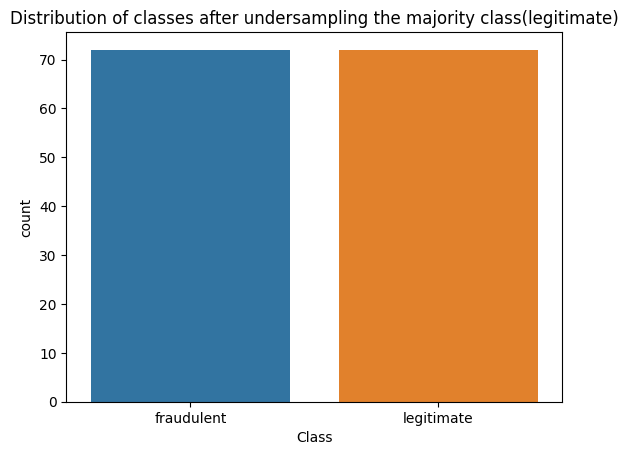

In [ ]:
plt.title('Distribution of classes after undersampling the majority class(legitimate)')
sns.countplot(data=balData, x='Class')

In [ ]:
X_trainNew = balData.iloc[:,0:30]
Y_trainNew = balData['Class']

In [ ]:
X_trainNew.shape

(144, 30)

In [ ]:
Y_trainNew.shape

(144,)

In [ ]:
X_trainNew.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Time,Amount
6717,-1.813280,4.917851,-5.926130,5.701500,1.204393,-3.035138,-1.713402,0.561257,-3.796354,-7.454841,...,0.615642,-0.406427,-0.737018,-0.279642,1.106766,0.323885,0.894767,0.569519,-1.082742,-0.356087
17048,-1.912798,-5.326197,-1.055879,1.309149,-2.053973,1.064722,1.452386,-0.046029,0.269889,-0.875509,...,0.981618,-0.595412,-1.324929,-0.143252,-0.506800,0.890304,-0.328324,0.263620,0.579230,6.696936
14104,1.192396,1.338974,-0.678876,3.123672,0.643245,-1.184323,0.397586,-0.253499,0.411135,-0.859862,...,-0.377503,-0.889597,-0.074208,0.035446,0.550578,-0.027171,-0.024921,0.073605,0.304618,-0.346594
27627,0.333499,1.699873,-2.596561,3.643945,-0.585068,-0.654659,-2.275789,0.675229,-2.042416,-2.834871,...,0.469212,-0.144363,-0.317981,-0.769644,0.807855,0.228164,0.551002,0.305473,1.097692,-0.275668
10897,-15.398845,7.472324,-19.026912,11.165526,-6.893856,-2.120937,-14.913330,-0.721214,-7.175097,-14.166795,...,-2.444884,0.727495,-0.345078,-0.981749,0.995271,0.816762,2.262942,-1.178063,-0.227895,-0.356087


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


# Instantiate SVM classifier
svm_clf2 = SVC(random_state=1, kernel='linear')

# Fit the model
svm_clf2.fit(X_trainNew, Y_trainNew)

# Make predictions
y_pred2 = svm_clf2.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(Y_test, y_pred2)
print("Accuracy:", accuracy)

Accuracy: 0.9520652728199898


In [ ]:
print('Accuracy of SVM classifier on balanced dataset: {:.2f}' .format(svm_clf2.score(X_test,Y_test)))

Accuracy of SVM classifier on balanced dataset: 0.95


In [ ]:
#balanced data metrics

In [ ]:
print(confusion_matrix(Y_test, y_pred2))

[[  18    1]
 [ 281 5583]]


In [ ]:
print(classification_report(Y_test, y_pred2))

              precision    recall  f1-score   support

  fraudulent       0.06      0.95      0.11        19
  legitimate       1.00      0.95      0.98      5864

    accuracy                           0.95      5883
   macro avg       0.53      0.95      0.54      5883
weighted avg       1.00      0.95      0.97      5883

